# Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 500)
# pd.set_option('display.width', 1000)

In [4]:
data_folder = './data-for-code/'

# import the CSV as a pandas dataframe
df = pd.read_csv( data_folder + 'food_subgroup_intake_and_average_survival.csv') 


# show the first five rows
df.shape
df.head(5) 

,participant_id,participant_age,gender,food_group_name,food_subgroup_name,avg_food_weight_in_gms,acr,kidney_failed,systolic_pressure,diastolic_pressure,calorie,protein,sodium,carbohydrate,sugar,fibre,fat,saturated_fat,mono_fat,poly_fat,cholesterol,calcium,phosphorous,magnesium,potassium,alcohol,m_food_group_name,a_sample_food_code,a_sample_food,a_sample_food_name,food_group_id,albumin_urine_mu_g,albumin_urine_mg,creatinine_mu_mol,creatinine_mg,received_dialysis_in_12_months,kidney_stones,passed_kidney_stones_12_months,urinary_leakage_frequency,urine_lose_each_time,leak_during_activities,how_frequent_leak_occurs,urinated_before_reaching_toilet,how_frequent,leak_during_nonphysical_activities,how_frequest_leak_nonphysical,how_much_leak_bothering,how_much_daily_activities_affected,count_night_time_urinate,2015,Average
0,86874,4,1,Grain products,"Cakes, cookies, pies, pastries, bars",150.0,10.71,NaN,NaN,NaN,569.0,4.74,465.0,83.04,58.83,2.3,26.63,8.690,10.821,7.092,24.0,48.0,207.0,30.0,281.0,0.0,Grain products,53121270,"Cake or cupcake, yellow, with icing or filling","CAKE OR CUPCAKE, YELLOW, WITH",5,10.6,10.6,8751.6,99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.7,90.265
1,86876,38,2,Grain products,"Cakes, cookies, pies, pastries, bars",30.0,10.58,2.0,112.0,72.0,139.0,1.61,116.0,20.20,8.19,0.4,5.87,2.300,2.091,1.124,4.0,11.0,30.0,4.0,26.0,0.0,Grain products,53241500,"Cookie, butter or sugar","COOKIE, BUTTER OR SUGAR",5,14.5,14.5,12110.8,137.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.1,92.085
2,86877,40,1,Grain products,"Cakes, cookies, pies, pastries, bars",59.5,7.40,2.0,136.0,74.0,428.0,6.62,391.0,71.14,22.37,1.1,13.25,3.324,7.359,1.798,0.0,41.0,109.0,17.0,96.0,0.0,Grain products,53710700,"Cookie, animal","COOKIE, ANIMAL",5,18.2,18.2,21746.4,246.0,NaN,1.0,2.0,1.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,NaN,1.0,NaN,93.5,91.000
3,86879,63,2,Grain products,"Cakes, cookies, pies, pastries, bars",45.0,12.11,2.0,180.0,58.0,221.0,2.30,140.0,29.41,14.81,0.9,11.12,3.641,2.822,3.788,0.0,9.0,49.0,18.0,77.0,0.0,Grain products,53201000,"Cookie, NFS","COOKIE, NFS",5,9.2,9.2,6718.4,76.0,NaN,2.0,NaN,1.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,NaN,1.0,NaN,85.4,81.800
4,86880,10,2,Grain products,"Cakes, cookies, pies, pastries, bars",52.0,4.49,NaN,106.0,46.0,390.0,4.38,326.0,59.64,34.16,2.4,16.08,4.745,7.794,2.991,0.0,18.0,78.0,39.0,197.0,0.0,Grain products,53209015,"Cookie, chocolate sandwich","COOKIE, CHOCOLATE SANDWICH",5,4.8,4.8,9458.8,107.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.4,98.305


In [5]:
df.shape, df.columns

((108768, 51),
 Index(['participant_id', 'participant_age', 'gender', 'food_group_name',
        'food_subgroup_name', 'avg_food_weight_in_gms', 'acr', 'kidney_failed',
        'systolic_pressure', 'diastolic_pressure', 'calorie', 'protein',
        'sodium', 'carbohydrate', 'sugar', 'fibre', 'fat', 'saturated_fat',
        'mono_fat', 'poly_fat', 'cholesterol', 'calcium', 'phosphorous',
        'magnesium', 'potassium', 'alcohol', 'm_food_group_name',
        'a_sample_food_code', 'a_sample_food', 'a_sample_food_name',
        'food_group_id', 'albumin_urine_mu_g', 'albumin_urine_mg',
        'creatinine_mu_mol', 'creatinine_mg', 'received_dialysis_in_12_months',
        'kidney_stones', 'passed_kidney_stones_12_months',
        'urinary_leakage_frequency', 'urine_lose_each_time',
        'leak_during_activities', 'how_frequent_leak_occurs',
        'urinated_before_reaching_toilet', 'how_frequent',
        'leak_during_nonphysical_activities', 'how_frequest_leak_nonphysical',
       

In [6]:
df_food_subgroup_only = df[ ['participant_id',  'food_subgroup_name', 'avg_food_weight_in_gms'] ]
df_food_subgroup_only.head()

df_food_subgroup_only_index = df_food_subgroup_only.set_index(['participant_id', 'food_subgroup_name'])
df_food_subgroup_only_index

df_food_subgroup_only_index_unstack = df_food_subgroup_only_index.unstack()
df_food_subgroup_only_index_unstack.head()

avg_food_weight_in_gms          \
food_subgroup_name   Alcoholic beverages     Beef   
participant_id                                      
83732                                 NaN  113.33   
83733                              1740.0     NaN   
83734                                 NaN  113.40   
83735                                 NaN     NaN   
83736                                 NaN     NaN   

                                                          \
food_subgroup_name Cakes, cookies, pies, pastries, bars    
participant_id                                             
83732                                               48.0   
83733                                              475.2   
83734                                                NaN   
83735                                                NaN   
83736                                                NaN   

                                                                     \
food_subgroup_name Cereals, not cooked or NS as to cooked  Cheeses    
participant_id                                                        
83732                                                  NaN      NaN   
83733                                                  NaN      NaN   
83734                                                  NaN      NaN   
83735                                                  NaN      NaN   
83736                                                  NaN      NaN   

                                           \
food_subgroup_name Citrus fruits, juices    
participant_id                              
83732                               192.0   
83733                                 NaN   
83734                                 NaN   
83735                                 NaN   
83736                                96.0   

                                                                   \
food_subgroup_name Crackers and salty snacks from grain products    
participant_id                                                      
83732                                                       32.05   
83733                                                         NaN   
83734                                                       28.00   
83735                                                       21.00   
83736                                                         NaN   

                                                                         \
food_subgroup_name Creams and cream substitutes  Dark-green vegetables    
participant_id                                                            
83732                                       2.94                   76.5   
83733                                        NaN                    NaN   
83734                                       7.83                    NaN   
83735                                      15.50                    NaN   
83736                                        NaN                    NaN   

                                                                       \
food_subgroup_name Deep-yellow vegetables  Dried fruits  Egg mixtures   
participant_id                                                          
83732                                  NaN           NaN          NaN   
83733                                  NaN           NaN          NaN   
83734                                  NaN           NaN          NaN   
83735                                  NaN           NaN          NaN   
83736                                  NaN           NaN          NaN   

                                                                       \
food_subgroup_name Egg substitutes    Eggs   Fats Fish and shellfish    
participant_id                                                          
83732                           NaN    NaN  28.63                 NaN   
83733                           NaN    NaN  14.19               453.0   
83734                           NaN  100.0  19.08                 NaN   
83735 

In [7]:
df_without_food_subgroups = df.drop(['food_subgroup_name',  'avg_food_weight_in_gms'], axis=1)
df_without_food_subgroups.head()

df_without_food_subgroups_one_entry = df_without_food_subgroups.groupby(['participant_id']).mean()
df_without_food_subgroups_one_entry.head()

,participant_age,gender,acr,kidney_failed,systolic_pressure,diastolic_pressure,calorie,protein,sodium,carbohydrate,sugar,fibre,fat,saturated_fat,mono_fat,poly_fat,cholesterol,calcium,phosphorous,magnesium,potassium,alcohol,a_sample_food_code,food_group_id,albumin_urine_mu_g,albumin_urine_mg,creatinine_mu_mol,creatinine_mg,received_dialysis_in_12_months,kidney_stones,passed_kidney_stones_12_months,urinary_leakage_frequency,urine_lose_each_time,leak_during_activities,how_frequent_leak_occurs,urinated_before_reaching_toilet,how_frequent,leak_during_nonphysical_activities,how_frequest_leak_nonphysical,how_much_leak_bothering,how_much_daily_activities_affected,count_night_time_urinate,2015,Average
participant_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
83732,62.0,1.0,6.10,2.0,128.0,70.0,181.761905,8.924048,395.420635,18.284286,7.138571,1.604762,8.670952,2.887048,3.226167,1.812476,36.809524,78.523810,120.452381,21.161905,256.547619,0.000000,5.692337e+07,5.380952,2.5,2.5,3624.4,41.0,NaN,2.0,NaN,1.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,NaN,0.0,NaN,85.4,81.800
83733,53.0,1.0,12.82,2.0,146.0,88.0,372.541667,12.121250,461.083333,37.678333,15.845000,1.083333,13.461667,3.826792,4.251542,3.626292,67.416667,68.000000,213.916667,35.541667,337.000000,7.904167,6.714642e+07,6.416667,23.2,23.2,16000.4,181.0,NaN,1.0,2.0,1.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,NaN,0.0,NaN,90.2,87.510
83734,78.0,1.0,150.00,1.0,138.0,46.0,204.575000,10.043000,396.916667,21.993500,6.542750,2.415000,8.814750,3.049475,2.874225,2.095025,41.600000,80.558333,135.575000,34.016667,347.925000,0.000000,5.075188e+07,4.750000,105.0,105.0,6188.0,70.0,2.0,2.0,NaN,2.0,1.0,2.0,NaN,2.0,NaN,2.0,NaN,NaN,1.0,NaN,70.5,65.575
83735,56.0,2.0,5.69,2.0,132.0,72.0,155.875000,8.677500,286.125000,17.962500,5.620000,1.687500,5.801250,2.003750,2.185750,1.188000,17.250000,158.125000,172.125000,37.625000,262.750000,0.000000,6.273985e+07,5.875000,5.8,5.8,9016.8,102.0,NaN,2.0,NaN,2.0,1.0,2.0,NaN,1.0,1.0,2.0,NaN,1.0,1.0,NaN,87.3,84.910
83736,42.0,2.0,15.11,2.0,100.0,70.0,119.500000,3.234000,195.700000,15.350000,8.909500,0.460000,5.207000,2.215200,1.832700,0.632500,18.100000,13.100000,45.050000,7.100000,86.650000,0.000000,6.585750e+07,6.300000,47.6,47.6,27846.0,315.0,NaN,2.0,NaN,1.0,NaN,2.0,NaN,1.0,2.0,2.0,NaN,1.0,1.0,NaN,93.5,91.000


In [8]:
merged = df_food_subgroup_only_index_unstack.merge(df_without_food_subgroups_one_entry,  how='inner', left_on='participant_id', right_on='participant_id', left_index=True)
merged.head()
merged.shape
merged.head()

,"(avg_food_weight_in_gms, Alcoholic beverages )","(avg_food_weight_in_gms, Beef)","(avg_food_weight_in_gms, Cakes, cookies, pies, pastries, bars )","(avg_food_weight_in_gms, Cereals, not cooked or NS as to cooked )","(avg_food_weight_in_gms, Cheeses )","(avg_food_weight_in_gms, Citrus fruits, juices )","(avg_food_weight_in_gms, Crackers and salty snacks from grain products )","(avg_food_weight_in_gms, Creams and cream substitutes )","(avg_food_weight_in_gms, Dark-green vegetables )","(avg_food_weight_in_gms, Deep-yellow vegetables )","(avg_food_weight_in_gms, Dried fruits )","(avg_food_weight_in_gms, Egg mixtures)","(avg_food_weight_in_gms, Egg substitutes )","(avg_food_weight_in_gms, Eggs)","(avg_food_weight_in_gms, Fats)","(avg_food_weight_in_gms, Fish and shellfish )","(avg_food_weight_in_gms, Formulated nutrition beverages, energy drinks, sports drinks, functional beverages )","(avg_food_weight_in_gms, Frankfurters, sausages, lunchmeats, meat spreads)","(avg_food_weight_in_gms, Frozen or shelf-stable plate meals with meat, poultry, fish as major ingredient )","(avg_food_weight_in_gms, Fruit juices and nectars excluding citrus )","(avg_food_weight_in_gms, Fruits and juices baby food )","(avg_food_weight_in_gms, Grain mixtures, frozen plate meals, soups )","(avg_food_weight_in_gms, Gravies from meat, poultry, fish base )","(avg_food_weight_in_gms, Lamb, veal, game, other carcass meat )","(avg_food_weight_in_gms, Legumes )","(avg_food_weight_in_gms, Meat substitutes, mainly cereal protein )","(avg_food_weight_in_gms, Meat, NS as to type )","(avg_food_weight_in_gms, Meat, poultry, fish in gravy or sauce or creamed )","(avg_food_weight_in_gms, Meat, poultry, fish with starch item (includes white potatoes) )","(avg_food_weight_in_gms, Meat, poultry, fish with starch item and vegetables )","(avg_food_weight_in_gms, Meat, poultry, fish with vegetables (excluding white potatoes) )","(avg_food_weight_in_gms, Milk desserts, sauces, gravies )","(avg_food_weight_in_gms, Milks and milk drinks )","(avg_food_weight_in_gms, Mixtures mostly vegetables without meat, poultry, fish )","(avg_food_weight_in_gms, Nonalcoholic beverages )","(avg_food_weight_in_gms, Nuts, nut butters, and nut mixtures )","(avg_food_weight_in_gms, Oils )","(avg_food_weight_in_gms, Organ meats and mixtures )","(avg_food_weight_in_gms, Other fruits )","(avg_food_weight_in_gms, Other vegetables )","(avg_food_weight_in_gms, Pancakes, waffles, French toast, other grain products )","(avg_food_weight_in_gms, Pastas, cooked cereals, rice )","(avg_food_weight_in_gms, Pork)","(avg_food_weight_in_gms, Poultry)","(avg_food_weight_in_gms, Quick breads )","(avg_food_weight_in_gms, Salad dressings )","(avg_food_weight_in_gms, Sandwiches with meat, poultry, fish )","(avg_food_weight_in_gms, Seeds and seed mixtures )","(avg_food_weight_in_gms, Soups, broths, extracts from meat, poultry, fish base )","(avg_food_weight_in_gms, Sugars and sweets )","(avg_food_weight_in_gms, Tomatoes and tomato mixtures )","(avg_food_weight_in_gms, Vegetables and mixtures mostly vegetables baby food )","(avg_food_weight_in_gms, Vegetables with meat, poultry, fish )","(avg_food_weight_in_gms, Water, noncarbonated )","(avg_food_weight_in_gms, White potatoes and Puerto Rican starchy vegetables )","(avg_food_weight_in_gms, Yeast breads, rolls )",participant_age,gender,acr,kidney_failed,systolic_pressure,diastolic_pressure,calorie,protein,sodium,carbohydrate,sugar,fibre,fat,saturated_fat,mono_fat,poly_fat,cholesterol,calcium,phosphorous,magnesium,potassium,alcohol,a_sample_food_code,food_group_id,albumin_urine_mu_g,albumin_urine_mg,creatinine_mu_mol,creatinine_mg,received_dialysis_in_12_months,kidney_stones,passed_kidney_stones_12_months,urinary_leakage_frequency,urine_lose_each_time,leak_during_activities,how_frequent_leak_occurs,urinated_before_reaching_toilet,how_frequent,leak_during_nonphysical_activities,how_frequest_leak_nonphysical,how_much_leak_bothering,how_much_daily_activities_affected,count_nigh

In [9]:
# remove extra spaces in the column names
column_dict = {}
for aName in merged.columns:
    #print(aName)
    try:
        #if ( aName.index( 'avg_food_weight_in_gms' ) >= 0):
        if 'avg_food_weight_in_gms' in aName:
            #aName = 
            column_dict[aName] = aName[1] #aName.strip()
        else:
            column_dict[aName] = aName #.strip()
        
    except:
        print(aName)
        continue

# column_dict

In [10]:
merged = merged.rename(index=str, columns=column_dict)
merged.head()

,Alcoholic beverages,Beef,"Cakes, cookies, pies, pastries, bars","Cereals, not cooked or NS as to cooked",Cheeses,"Citrus fruits, juices",Crackers and salty snacks from grain products,Creams and cream substitutes,Dark-green vegetables,Deep-yellow vegetables,Dried fruits,Egg mixtures,Egg substitutes,Eggs,Fats,Fish and shellfish,"Formulated nutrition beverages, energy drinks, sports drinks, functional beverages","Frankfurters, sausages, lunchmeats, meat spreads","Frozen or shelf-stable plate meals with meat, poultry, fish as major ingredient",Fruit juices and nectars excluding citrus,Fruits and juices baby food,"Grain mixtures, frozen plate meals, soups","Gravies from meat, poultry, fish base","Lamb, veal, game, other carcass meat",Legumes,"Meat substitutes, mainly cereal protein","Meat, NS as to type","Meat, poultry, fish in gravy or sauce or creamed","Meat, poultry, fish with starch item (includes white potatoes)","Meat, poultry, fish with starch item and vegetables","Meat, poultry, fish with vegetables (excluding white potatoes)","Milk desserts, sauces, gravies",Milks and milk drinks,"Mixtures mostly vegetables without meat, poultry, fish",Nonalcoholic beverages,"Nuts, nut butters, and nut mixtures",Oils,Organ meats and mixtures,Other fruits,Other vegetables,"Pancakes, waffles, French toast, other grain products","Pastas, cooked cereals, rice",Pork,Poultry,Quick breads,Salad dressings,"Sandwiches with meat, poultry, fish",Seeds and seed mixtures,"Soups, broths, extracts from meat, poultry, fish base",Sugars and sweets,Tomatoes and tomato mixtures,Vegetables and mixtures mostly vegetables baby food,"Vegetables with meat, poultry, fish","Water, noncarbonated",White potatoes and Puerto Rican starchy vegetables,"Yeast breads, rolls",participant_age,gender,acr,kidney_failed,systolic_pressure,diastolic_pressure,calorie,protein,sodium,carbohydrate,sugar,fibre,fat,saturated_fat,mono_fat,poly_fat,cholesterol,calcium,phosphorous,magnesium,potassium,alcohol,a_sample_food_code,food_group_id,albumin_urine_mu_g,albumin_urine_mg,creatinine_mu_mol,creatinine_mg,received_dialysis_in_12_months,kidney_stones,passed_kidney_stones_12_months,urinary_leakage_frequency,urine_lose_each_time,leak_during_activities,how_frequent_leak_occurs,urinated_before_reaching_toilet,how_frequent,leak_during_nonphysical_activities,how_frequest_leak_nonphysical,how_much_leak_bothering,how_much_daily_activities_affected,count_night_time_urinate,2015,Average
participant_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
83732,NaN,113.33,48.0,NaN,NaN,192.0,32.05,2.94,76.5,NaN,NaN,NaN,NaN,NaN,28.63,NaN,NaN,NaN,NaN,NaN,NaN,237.97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,488.0,NaN,484.88,NaN,NaN,NaN,202.00,60.75,NaN,NaN,126.00,175.0,NaN,14.0,204.0,NaN,NaN,3.00,20.00,NaN,NaN,280.0,187.5,63.5,62.0,1.0,6.10,2.0,128.0,70.0,181.761905,8.924048,395.420635,18.284286,7.138571,1.604762,8.670952,2.887048,3.226167,1.812476,36.809524,78.523810,120.452381,21.161905,256.547619,0.000000,5.692337e+07,5.380952,2.5,2.5,3624.4,41.0,NaN,2.0,NaN,1.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,NaN,0.0,NaN,85.4,81.800
83733,1740.0,NaN,475.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.19,453.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,465.00,NaN,NaN,NaN,NaN,87.80,NaN,NaN,91.00,NaN,66.0,NaN,NaN,NaN,NaN,7.29,123.00,NaN,NaN,493.5,NaN,64.0,53.0,1.0,12.82,2.0,146.0,88.0,372.541667,12.121250,461.083333,37.678333,15.845000,1.083333,13.461667,3.826792,4.251542,3.626292,67.416667,68.000000,213.916667,35.541667,337.000000,7.904167,6.714642e+07,6.416667,23.2,23.2,16000.4,181.0,NaN,1.0,2.0,1.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,NaN,0.0,NaN,90.2,87.510
83734,NaN,113.40,NaN,NaN,NaN,NaN,28.00,7.83,NaN,NaN,NaN,NaN,NaN,100.0,19.08,NaN,NaN,70.0,NaN,NaN,NaN,NaN,NaN,NaN,326.25,NaN,NaN,NaN,NaN,NaN,182.0,NaN,526.0,NaN,380.75,NaN,NaN,NaN,350.33,50.80,128.0,NaN,15.18,NaN,NaN,14.7,225.0,NaN,NaN,NaN,23.99,NaN,NaN,530.0,255.0,81.0,78.0,1.0,150.00,1.0,138.0,46.0,

In [11]:
merged_f = merged.fillna(0)
merged_f.to_csv(data_folder + 'survival-food-subgroups-subgroup-names-on-columns-survival.csv')

In [12]:
merged_f.head()
df = merged_f
st = df

In [13]:
# Take only the important columns

In [14]:
"""
st = df[
    
    [
        'Fruits and juices baby food', 'Nuts, Seeds, and Soy Products', 'Oils',
        'Dried fruits', 
        'Added Sugars/Sugars and sweets',
       'Alcoholic beverages', 'Citrus fruits, juices', 'Dark-green vegetables',
       'Fruit juices and nectars excluding citrus',
       'Meat, Poultry and Eggs subgroup', 'Milk desserts, sauces, gravies',
       'Milks and milk drinks ', 'Nonalcoholic beverages', 'Other fruits',
       'Other vegetables', 'Protein', 'Red and orange vegetables',
       'Refined grains', 'Seafood',      
       'Solid Fats',
       'Starchy vegetables', 'Water, noncarbonated', 'Whole grains',
       'acr', 'acr_category', 'acr_category_2'
    
    ]
]
"""

"\nst = df[\n    \n    [\n        'Fruits and juices baby food', 'Nuts, Seeds, and Soy Products', 'Oils',\n        'Dried fruits', \n        'Added Sugars/Sugars and sweets',\n       'Alcoholic beverages', 'Citrus fruits, juices', 'Dark-green vegetables',\n       'Fruit juices and nectars excluding citrus',\n       'Meat, Poultry and Eggs subgroup', 'Milk desserts, sauces, gravies',\n       'Milks and milk drinks ', 'Nonalcoholic beverages', 'Other fruits',\n       'Other vegetables', 'Protein', 'Red and orange vegetables',\n       'Refined grains', 'Seafood',      \n       'Solid Fats',\n       'Starchy vegetables', 'Water, noncarbonated', 'Whole grains',\n       'acr', 'acr_category', 'acr_category_2'\n    \n    ]\n]\n"

In [15]:
# set palette : colorblind friendly

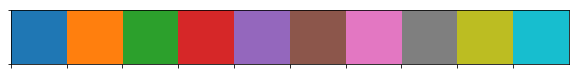

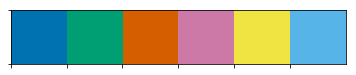

In [16]:
# deep, muted, pastel, bright, dark, and colorblind.
current_palette = sns.color_palette()
sns.palplot(current_palette)
sns.set_palette('colorblind')
current_palette = sns.color_palette()
sns.palplot(current_palette)


# Apply Machine Learning 

# Linear Regression
# Bayesian
# RandomForest Regression

In [18]:
st.columns

Index(['Alcoholic beverages ', 'Beef', 'Cakes, cookies, pies, pastries, bars ',
       'Cereals, not cooked or NS as to cooked ', 'Cheeses ',
       'Citrus fruits, juices ',
       'Crackers and salty snacks from grain products ',
       'Creams and cream substitutes ', 'Dark-green vegetables ',
       'Deep-yellow vegetables ', 'Dried fruits ', 'Egg mixtures',
       'Egg substitutes ', 'Eggs', 'Fats', 'Fish and shellfish ',
       'Formulated nutrition beverages, energy drinks, sports drinks, functional beverages ',
       'Frankfurters, sausages, lunchmeats, meat spreads',
       'Frozen or shelf-stable plate meals with meat, poultry, fish as major ingredient ',
       'Fruit juices and nectars excluding citrus ',
       'Fruits and juices baby food ',
       'Grain mixtures, frozen plate meals, soups ',
       'Gravies from meat, poultry, fish base ',
       'Lamb, veal, game, other carcass meat ', 'Legumes ',
       'Meat substitutes, mainly cereal protein ', 'Meat, NS as to type

In [19]:
# as CKD data is between 10 to 15%, data need to be evenly distributed otherwise bias will be there
# alternatively, Five fold cross validation can be used

In [20]:
# Split data into Train and Test
# Use 10% of dataset as testing data

In [21]:
from sklearn.model_selection import train_test_split

## Using 2015 survival probabilities as the target
# Finding MSE, RMSE, Accuracy error



In [22]:
y = st['2015']
X = st.drop(columns=['Average', '2015'])

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.10, random_state=42)
len(y_train), len(y_test)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# create the model
model = LinearRegression().fit(X_train, y_train)

train_predicted = model.predict(X_train)
test_predicted = model.predict(X_test)

train_mse = mean_squared_error(y_train, train_predicted)
test_mse = mean_squared_error(y_test, test_predicted)

print('MSE train data, MSE test data', train_mse, test_mse)
print('RMSE train data, RMSE test data', np.sqrt(np.absolute(train_mse)),  np.sqrt(np.absolute(test_mse)) )
print('R2 train data, R2 test data', r2_score(y_train, train_predicted), r2_score(y_test, test_predicted))
list(abs(test_predicted) >0.5)

MSE train data, MSE test data 9.764225149069757 10.059648696067002
RMSE train data, RMSE test data 3.1247760158241356 3.171694924810235
R2 train data, R2 test data 0.8792316134983882 0.8696534568774607


[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,

# Use 2015 survival as the Target variable

In [23]:
# y = st['Average']
y = st['2015']
X = st.drop(columns=['Average', '2015'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)
len(y_train), len(y_test)

# create the model
model = LinearRegression().fit(X_train, y_train)

train_predicted = model.predict(X_train)
test_predicted = model.predict(X_test)

train_mse = mean_squared_error(y_train, train_predicted)
test_mse = mean_squared_error(y_test, test_predicted)

print('MSE train data, MSE test data', train_mse, test_mse)
print('RMSE train data, RMSE test data', np.sqrt(np.absolute(train_mse)),  np.sqrt(np.absolute(test_mse)) )
print('R2 train data, R2 test data', r2_score(y_train, train_predicted), r2_score(y_test, test_predicted))

MSE train data, MSE test data 9.764225149066585 10.059648696069587
RMSE train data, RMSE test data 3.1247760158236275 3.1716949248106423
R2 train data, R2 test data 0.8792316134984274 0.8696534568774271


# use cross validations using Linear Regression
# 2015 survival as the target

In [25]:
from sklearn.model_selection import cross_val_score


y = st['Average']
y = st['2015']
X = st.drop(columns=['Average', '2015'])
linear_regression_cross_validation_scores = cross_val_score(LinearRegression(), X, y, cv = 10)

print("Accuracy, Standard Deviations (+/- 2) :", linear_regression_cross_validation_scores.mean(), linear_regression_cross_validation_scores.std() * 2) 
print('All Scores', linear_regression_cross_validation_scores)
print('\n\n')

# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
# " In multilabel classification, this function computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true. "

Data Not Normalized, Absolute ACR as the target
Accuracy, Standard Deviations (+/- 2) : 0.8737254002737421 0.009259078503739183
All Scores [0.87056245 0.87844429 0.87774739 0.87966261 0.87670929 0.86382014
 0.87395519 0.86907356 0.87266426 0.87461483]





# Apply Polynomial Regression

In [26]:
from sklearn.preprocessing import PolynomialFeatures


y = st['Average']
y = st['2015']
X = st.drop(columns=['Average', '2015'])
X_poly =  PolynomialFeatures(degree = 2).fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_poly, y, test_size=0.10, random_state=42)

Data Not Normalized, Absolute ACR as the target


In [27]:
poly_regression = LinearRegression().fit(X_train, y_train)

poly_regression_train_pred = poly_regression.predict(X_train)
poly_regression_test_pred = poly_regression.predict(X_test)

poly_regression_train_mse = mean_squared_error(y_train, poly_regression_train_pred)
poly_regression_test_mse = mean_squared_error(y_test, poly_regression_test_pred)


print('MSE train data, MSE test data', poly_regression_train_mse, poly_regression_test_mse)
print('RMSE train data, RMSE test data', np.sqrt(np.absolute(poly_regression_train_mse)),  np.sqrt(np.absolute(poly_regression_train_mse)))                                                            
print('R2 train data:, R2 test data', r2_score(y_train, poly_regression_train_pred), r2_score(y_test, poly_regression_test_pred))

MSE train data, MSE test data 1.0603702656911438 121.72287338237444
RMSE train data, RMSE test data 1.0297428153141657 1.0297428153141657
R2 train data:, R2 test data 0.9868848573105665 -0.5772077379340517


In [28]:
poly_regression_cv = cross_val_score(LinearRegression(), X_poly, y, cv = 5)
print("Accuracy and Standard Deviations (+/- 2) ", poly_regression_cv.mean(), poly_regression_cv.std() * 2)
print ('All Scores', poly_regression_cv)

Accuracy and Standard Deviations (+/- 2)  -1.9086199777229425 2.9053185684926532
All Scores [-1.04165312 -0.50039128 -4.41478429 -2.66170411 -0.92456709]


# RandomForestRegressor

In [29]:
from sklearn.ensemble import RandomForestRegressor


y = st['Average']
y = st['2015']
X = st.drop(columns=['Average', '2015'])
X_poly =  PolynomialFeatures(degree = 2).fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_poly, y, test_size=0.10, random_state=42)

# lees number of estimators can be tried to see the accuracy with less execution time
random_forest = RandomForestRegressor(n_estimators = 100, bootstrap=True, criterion='mse', max_depth=2).fit(X_train, y_train)

random_forest_train_pred = random_forest.predict(X_train)
random_forest_test_pred = random_forest.predict(X_test)

random_forest_train_mse = mean_squared_error(y_train, random_forest_train_pred)
random_forest_test_mse = mean_squared_error(y_test, random_forest_test_pred)

print('MSE train data, MSE test data', random_forest_train_mse, random_forest_test_mse)
print('RMSE train data, RMSE test data', np.sqrt(np.absolute(random_forest_train_mse)),  np.sqrt(np.absolute(random_forest_train_mse)))
print('R2 train data, R2 test data', r2_score(y_train, random_forest_train_pred), r2_score(y_test, random_forest_test_pred))

Data Not Normalized, Absolute ACR as the target
MSE train data, MSE test data 6.505972950160663 6.445378515893091
RMSE train data, RMSE test data 2.550680879718328 2.550680879718328
R2 train data, R2 test data 0.9195311615803031 0.9164848759587985


# RandomForestRegressor with cross validation 
K Fold

In [30]:
random_forest_cv = cross_val_score(RandomForestRegressor(n_estimators = 100, bootstrap=True, criterion='mse', max_depth=2), X_poly, y, cv = 5)
print("Accuracy: Mean and Standard Deviations", random_forest_cv.mean(), random_forest_cv.std() * 2)
print('All scores', random_forest_cv)

Accuracy: Mean and Standard Deviations 0.9199252729983216 0.013099232983670599
All scores [0.91691393 0.93134251 0.91404089 0.91434822 0.92298083]


From: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
Ref: Example Parameters:        
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [32]:
random_forest_cv

array([0.91691393, 0.93134251, 0.91404089, 0.91434822, 0.92298083])

# Bayesian

In [34]:
from sklearn.linear_model import BayesianRidge


y = st['Average']
y = st['2015']
X = st.drop(columns=['Average', '2015'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

bayesian = BayesianRidge().fit(X_train, y_train)

bayesian_train_pred = bayesian.predict(X_train)
bayesian_test_pred = bayesian.predict(X_test)

bayesian_train_mse = mean_squared_error(y_train, bayesian_train_pred)
bayesian_test_mse = mean_squared_error(y_test, bayesian_test_pred)

print('MSE train data, MSE test data', bayesian_train_mse, bayesian_test_mse)
print('RMSE train data, RMSE test data', np.sqrt(np.absolute(bayesian_train_mse)),  np.sqrt(np.absolute(bayesian_train_mse)))
                                                               
print('R2 train data, R2 test data', r2_score(y_train, bayesian_train_pred), r2_score(y_test, bayesian_test_pred))

print('#########################################')

MSE train data, MSE test data 9.794079101552265 10.061498052597019
RMSE train data, RMSE test data 3.1295493448022618 3.1295493448022618
R2 train data, R2 test data 0.8788623662087196 0.8696294940892986
#########################################


# Polynomial

In [36]:
#X_poly =  PolynomialFeatures(degree = 2).fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.10, random_state=42)

bayesian = BayesianRidge().fit(X_train, y_train)

bayesian_train_pred = bayesian.predict(X_train)
bayesian_test_pred = bayesian.predict(X_test)

bayesian_train_mse = mean_squared_error(y_train, bayesian_train_pred)
bayesian_test_mse = mean_squared_error(y_test, bayesian_test_pred)

print('Bayesian on Polynomial fit')
print('MSE train data, MSE test data', bayesian_train_mse, bayesian_test_mse)
print('RMSE train data, RMSE test data', np.sqrt(np.absolute(bayesian_train_mse)),  np.sqrt(np.absolute(bayesian_train_mse)))
                                                               
print('R2 train data, R2 test data', r2_score(y_train, bayesian_train_pred), r2_score(y_test, bayesian_test_pred))

Bayesian on Polynomial fit
MSE train data, MSE test data 4.208880026402317 10.302807177360028
RMSE train data, RMSE test data 2.0515555138485326 2.0515555138485326
R2 train data, R2 test data 0.94794265371729 0.8665027636052528


# Bayesian with Cross Validation
Polynomial X is used 

In [37]:
bayesian_cv = cross_val_score(BayesianRidge(), X_poly, y, cv = 5)
print("Accuracy and Standard Deviations", bayesian_cv.mean(), bayesian_cv.std() * 2) 
print('All Scores', bayesian_cv)

Accuracy and Standard Deviations 0.764463816301802 0.3019204129703462
All Scores [0.46550975 0.86175398 0.85979255 0.83113807 0.80412473]


# https://machinelearningmastery.com/metrics-evaluate-machine-learning-algorithms-python/

"Some evaluation metrics (like mean squared error) are naturally descending scores (the smallest score is best) and as such are reported as negative by the cross_val_score() function. This is important to note, because some scores will be reported as negative that by definition can never be negative."

# The following can be ignored, Kfold cross validation is already considered above

References

Projects mentioned on: http://sitestree.com/prediction-bayesian-regression-concepts-example-projects/

Insurance HealthCare Costs: https://github.com/techshot25/HealthCare 
Linear and Bayesian modeling in R: Predicting movie popularity
https://towardsdatascience.com/linear-and-bayesian-modelling-in-r-predicting-movie-popularity-6c8ef0a44184 

Bayesian-Stock-Price-Prediction
https://github.com/lschlessinger1/Bayesian-Stock-Price-Prediction 
 
Bayesian Prediction: Well (Oil) Production
https://github.com/jpgrana/bayesian-approach-predicting-well-production  

Binary Classification on Stock Market (S&P 500) using Naive Bayes and Logistic Regression 
https://github.com/NeilPrabhu/Stock-Prediction 

Naive Bayes Weather Prediction
https://github.com/husnainfareed/simple-naive-bayes-weather-prediction/blob/master/bayes.py 

Regression Predict Fuel Efficiency:
https://www.tensorflow.org/tutorials/keras/basic_regression

Regression-Example-Predicting-House-Prices
https://github.com/andersy005/deep-learning/blob/master/keras/04-A-Regression-Example-Predicting-House-Prices.ipynb 

Stock Price Prediction using Regression
https://github.com/chaitjo/regression-stock-prediction 

Concept:
Predicting the Future with Bayes’ Theorem
https://fs.blog/2018/09/bayes-theorem/ 

Chapter 5 - Bayesian Prediction
https://www.sciencedirect.com/science/article/pii/B9780123748546000089  

Books:

Bayesian Methods for Hackers
https://github.com/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers  

Multiple-linear-regression
https://github.com/topics/multiple-linear-regression 

Making Predictions with Regression Analysis
https://statisticsbyjim.com/regression/predictions-regression/  

Regression and Prediction
http://jukebox.esc13.net/untdeveloper/RM/Stats_Module_5/Stats_Module_56.html 
 

https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6    